#### 결정트리 알고리즘 기반 모델
- 데이터셋의 피쳐(특성)을 기준으로 데이터를 분류하는 알고리즘
- 질문방식으로 yes/no 결과에 따라 데이터셋 분리가 됨
- 장점 : 스케일링이나 정규화 불필요 ==> 성능의 영향이 없음, 쉬운 알고리즘
- 단점 : 과대적합 ==> 해결을 위한 많은 하이퍼파라미터 존재
- 다른 ML 알고리즘에 비해 성능이 좋지않을    
 => 단 여러개의 DT가 모이면 성능 좋아짐 >> 앙상블에 주로 사용됨!

1. 모듈로딩 및 데이터 준비

In [2]:
# 모듈로딩
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [3]:
# 데이터 로딩
featureDF, targetSR = load_iris(as_frame=True, return_X_y=True)

print(f'featureDF : {featureDF.shape}, {featureDF.ndim}')
print(f'targetSR : {targetSR.shape}, {targetSR.ndim}')

featureDF : (150, 4), 2
targetSR : (150,), 1


2. 학습용 데이터셋 준비

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=10,
                                                    stratify=targetSR)


In [6]:
print(f'X_train : {X_train.shape}, {X_train.ndim}/ y_train : {y_train.shape}, {y_train.ndim}')
print(f'X_test : {X_test.shape}, {X_test.ndim}/ y_test : {y_test.shape}, {y_test.ndim}')


X_train : (112, 4), 2/ y_train : (112,), 1
X_test : (38, 4), 2/ y_test : (38,), 1


3. 학습 - 기본 학습

In [7]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [8]:
# 모델 파라미터 : 학습 fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'[ dt_model.classes_ ] {dt_model.classes_}')
print(f'[ dt_model.n_classes_ ] {dt_model.n_classes_}개')
print(f'[ dt_model.max_features_ ] {dt_model.max_features_}개')
print(f'[ dt_model.feature_names_in_ ] {dt_model.feature_names_in_}')
print(f'[ dt_model.feature_importances_ ] {dt_model.feature_importances_}')

[ dt_model.classes_ ] [0 1 2]
[ dt_model.n_classes_ ] 3개
[ dt_model.max_features_ ] 4개
[ dt_model.feature_names_in_ ] ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
[ dt_model.feature_importances_ ] [0.03125249 0.         0.06844775 0.90029976]


* 성능체크

In [9]:
# 학습용 데이터셋에 대한 성능
train_score = dt_model.score(X_train,y_train)
test_score = dt_model.score(X_test,y_test)

In [10]:
print(f'train_score, test_score = {train_score}, {test_score}')

train_score, test_score = 1.0, 1.0


4. 교차검증 => 데이터셋 부족 해결 및 과대적합을 회피 

In [11]:
from sklearn.model_selection import StratifiedKFold, cross_validate,GridSearchCV

# 교차검증 준비 => 모델 인스턴스, trainDS, cv=5 (기본)
dt_model2 = DecisionTreeClassifier(random_state=10)
result = cross_validate(dt_model2, X_train, y_train,
                        return_train_score=True,
                        return_estimator=True)


In [12]:
# dict => DF
resultDF =pd.DataFrame(result)

In [13]:
resultDF
## 수식이 없음

,fit_time,score_time,estimator,test_score,train_score
0,0.003596,0.002919,DecisionTreeClassifier(random_state=10),0.956522,1.0
1,0.003122,0.002990,DecisionTreeClassifier(random_state=10),0.956522,1.0
2,0.015847,0.001993,DecisionTreeClassifier(random_state=10),0.954545,1.0
3,0.003990,0.001993,DecisionTreeClassifier(random_state=10),0.909091,1.0
4,0.003730,0.001979,DecisionTreeClassifier(random_state=10),0.909091,1.0


5. 성능 항상을 위한 튜닝 ==> 하이퍼파라미터 설정    
: 단점 >> 과대적합    
   그래서 이걸 해결하기위해 => max_depth, min_samples_leaf, .... ==> 하이퍼파라미터가 많음

In [14]:
# 하이퍼파라미터 dit 생성
params = {'max_depth': [4,3,2,1],
          'min_samples_leaf': [5,3,2]}

In [15]:
gscv = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=params,
                    return_train_score=True, refit=True) # refit[매개변순] - best로 다시 학습
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [16]:
print(f'[ gscv.best_params_ ] {gscv.best_params_}')
print(f'[ gscv.best_score_ ] {gscv.best_score_}')
print(f'[ gscv.best_estimator_ ] {gscv.best_estimator_}')
# print(f'[ gscv.best_params_ ] {gscv.cv_results_}')
# >> 보기 힘드니깐 차라리 DF로 보자

[ gscv.best_params_ ] {'max_depth': 4, 'min_samples_leaf': 2}
[ gscv.best_score_ ] 0.9371541501976285
[ gscv.best_estimator_ ] DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)


In [17]:
cv_resultDF = pd.DataFrame(gscv.cv_results_)
cv_resultDF.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

#### * 주요 피쳐 시각화

In [18]:
## 가장 좋은 모델
best_model= gscv.best_estimator_

In [19]:
print(f'[best_model.max_depth] : {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] : {best_model.min_samples_leaf}')

[best_model.max_depth] : 4
[best_model.min_samples_leaf] : 2


In [20]:
# 피쳐 중요도 및 개수
print(best_model.feature_importances_, best_model.n_features_in_,best_model.feature_names_in_, sep='\n')

[0.01321873 0.         0.07164651 0.91513476]
4
['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']


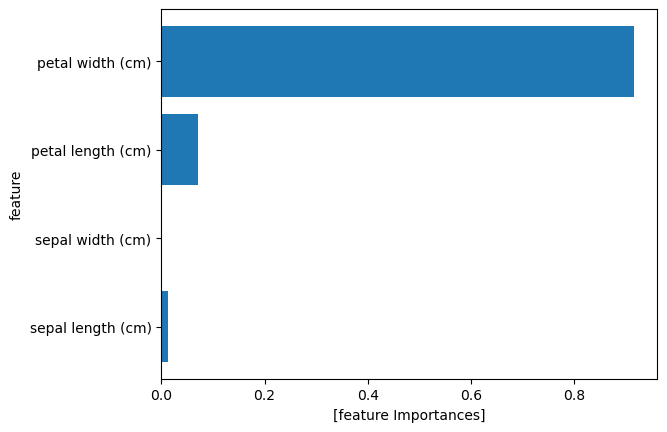

In [21]:
import matplotlib.pyplot as plt
plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('[feature Importances]')
plt.ylabel('feature')
plt.show()

????????????????????????????????????????????????????????????????????
많이 다른뎁쇼??

- DF 그래프 시각화
 - Graphviz 프로그램(OS에 맞는 버전)설치 + python용 패키지 graphviz설치

In [22]:
## (1) DF 모델 을 dot포멧의 파일로 저장 ==> export_graphviz()

from sklearn.tree import export_graphviz

export_graphviz(best_model, 
                out_file='tree.dot',
                class_names=['setosa','versicolor','verginlca'],
                feature_names= best_model.feature_names_in_,
                impurity=True, filled=True, rounded=True)

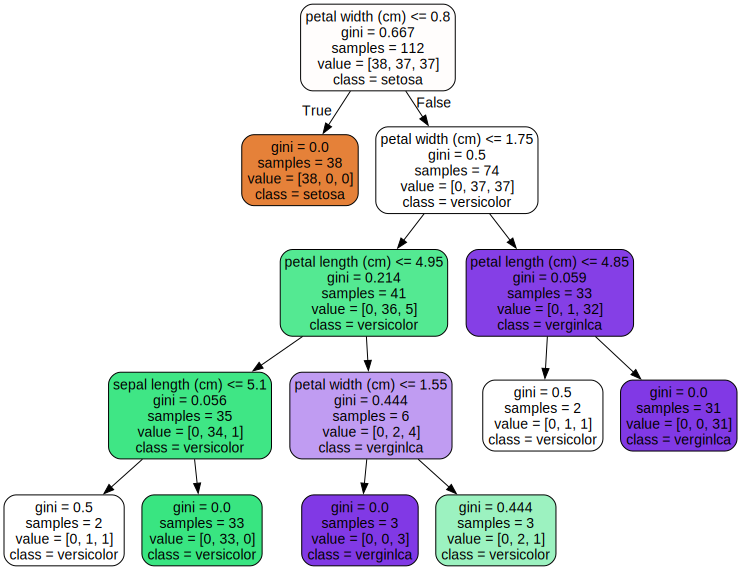

In [23]:
## (2) dot파일 출력
import graphviz

# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data=f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

[6] 새로운 데이터 예측

In [24]:
new_data = featureDF.iloc[:1]+0.21
new_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.31,3.71,1.61,0.41


In [25]:
new_data.shape

(1, 4)

In [26]:
best_model.predict(new_data)

array([0])

In [27]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])